## Introduction
This Not Notebook contain a data analysis and a machine learning model used in a bad-driver.csv dataset.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv("bad-drivers.csv")
data.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [38]:
data.shape

(51, 8)

In [39]:
data.describe()

,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
count,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000
mean,15.790196,31.725490,30.686275,85.921569,88.72549,886.957647,134.493137
std,4.122002,9.633438,5.132213,15.158949,6.96011,178.296285,24.835922
min,5.900000,13.000000,16.000000,10.000000,76.00000,641.960000,82.750000
25%,12.750000,23.000000,28.000000,83.000000,83.50000,768.430000,114.645000
50%,15.600000,34.000000,30.000000,88.000000,88.00000,858.970000,136.050000
75%,18.500000,38.000000,33.000000,95.000000,95.00000,1007.945000,151.870000
max,23.900000,54.000000,44.000000,100.000000,100.00000,1301.520000,194.780000


In [40]:
# Rename Columns
data = data.rename(columns = 
                   {"Number of drivers involved in fatal collisions per billion miles":"drivers_per_bil_miles", 
                    "Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding":"drivers_overspeeding", 
                    "Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired":"drunk_drivers", 
                    "Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted":"not_distracted",
                    "Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents":"first_accident", 
                    "Car Insurance Premiums ($)":"car_insurance_pre", 
                    "Losses incurred by insurance companies for collisions per insured driver ($)":"losses_due_insurance"}, 
                   inplace = False)

In [41]:
data.head()

,State,drivers_per_bil_miles,drivers_overspeeding,drunk_drivers,not_distracted,first_accident,car_insurance_pre,losses_due_insurance
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [42]:
# Functions to check anomaly in percentages(>100, or <0)
def percentage_check(column_data):
    for i in column_data:
        if i>100 and i<0:
            print(i)
        else:
            return "Ok"
        
print(percentage_check(data["drivers_per_bil_miles"]))
print(percentage_check(data["drivers_overspeeding"]))
print(percentage_check(data["drunk_drivers"]))
print(percentage_check(data["not_distracted"]))
print(percentage_check(data["first_accident"]))

Ok
Ok
Ok
Ok
Ok


In [43]:
# No null values
print(data["drivers_per_bil_miles"].isnull().value_counts())
print(data["drivers_overspeeding"].isnull().value_counts())
print(data["drunk_drivers"].isnull().value_counts())
print(data["not_distracted"].isnull().value_counts())
print(data["first_accident"].isnull().value_counts())

False    51
Name: drivers_per_bil_miles, dtype: int64
False    51
Name: drivers_overspeeding, dtype: int64
False    51
Name: drunk_drivers, dtype: int64
False    51
Name: not_distracted, dtype: int64
False    51
Name: first_accident, dtype: int64


In [44]:
# Explanatory data analysis
# Average percentages
print(data["drivers_per_bil_miles"].mean())
print(data["drivers_overspeeding"].mean())
print(data["drunk_drivers"].mean())
print(data["not_distracted"].mean())
print(data["first_accident"].mean())

15.79019607843137
31.725490196078432
30.686274509803923
85.92156862745098
88.72549019607843


1. It can be seen the highest percentage is on first time accident. This indicated that Most drivers who experience accident does so for the first time and it never happen again to them.
2. It can also be seen across the states, we have the most accident without an distraction.
3. Unlike we could have expected, drunkardness and overspeeding doesnt have a high percentage

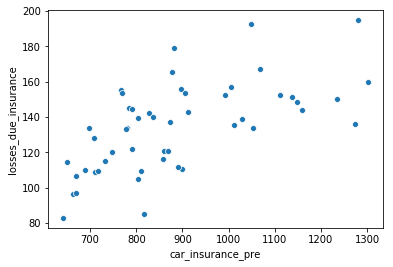

In [45]:
# detecting Outliers in percentage distribution
sns.scatterplot(data = data, x = "car_insurance_pre", y="losses_due_insurance")

In [46]:
data.reset_index(drop=True, inplace = True)
data.head()

,State,drivers_per_bil_miles,drivers_overspeeding,drunk_drivers,not_distracted,first_accident,car_insurance_pre,losses_due_insurance
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [47]:
data.drop('State', axis='columns', inplace=True)

,drivers_per_bil_miles,drivers_overspeeding,drunk_drivers,not_distracted,first_accident,car_insurance_pre,losses_due_insurance
0,18.8,39,30,96,80,784.55,145.08
1,18.1,41,25,90,94,1053.48,133.93
2,18.6,35,28,84,96,899.47,110.35
3,22.4,18,26,94,95,827.34,142.39
4,12.0,35,28,91,89,878.41,165.63


In [115]:
X = data[["drivers_per_bil_miles", "drivers_overspeeding", "drunk_drivers", "not_distracted", "first_accident", "car_insurance_pre"]]
X.head()

,drivers_per_bil_miles,drivers_overspeeding,drunk_drivers,not_distracted,first_accident,car_insurance_pre
0,18.8,39,30,96,80,784.55
1,18.1,41,25,90,94,1053.48
2,18.6,35,28,84,96,899.47
3,22.4,18,26,94,95,827.34
4,12.0,35,28,91,89,878.41


In [116]:
col = ['losses_due_insurance']
y = data[col]
y.head()

,losses_due_insurance
0,145.08
1,133.93
2,110.35
3,142.39
4,165.63


In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
y_train.head()

,losses_due_insurance
8,136.05
49,106.62
6,167.02
47,111.62
4,165.63


In [125]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [126]:
# Test
y_pred = reg.predict(X_test)

In [127]:
reg.score(X_train, y_train)

0.429280247885681

In [128]:
import pickle
pickle.dump(reg, open('model.pkl', 'wb'))

In [129]:
models = pickle.load(open('model.pkl', 'rb'))
print(models.predict([[4, 30, 50, 90, 89, 780]]))

[[97.87365656]]
